In [ ]:
#@title OpenPifPaf Prediction Demo


In [1]:
!pip install openpifpaf==0.12.14

     |████████████████████████████████| 770 kB 2.3 MB/s 
     |████████████████████████████████| 166 kB 44.7 MB/s 
     |████████████████████████████████| 1.4 MB 37.9 MB/s 
     |████████████████████████████████| 510 kB 39.6 MB/s 
  Created wheel for pysparkling: filename=pysparkling-0.6.1-py3-none-any.whl size=187580 sha256=da64aadfbb9a533d3dd349e55f767aa6aa86ddbcf51ea40767c77eb7c88e48f6
  Stored in directory: /root/.cache/pip/wheels/c8/2e/ac/5336e8ec240e9895bf4f142026f16d0d442af578d339c44aa0
Successfully built pysparkling
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [1]:
import io
import numpy as np
import openpifpaf
import PIL
import requests
import torch

print(openpifpaf.__version__)
print(torch.__version__)

0.12.14
1.9.0+cu102


In [2]:
image_response = requests.get('https://raw.githubusercontent.com/openpifpaf/openpifpaf/main/docs/coco/000000081988.jpg')
pil_im = PIL.Image.open(io.BytesIO(image_response.content)).convert('RGB')
im = np.asarray(pil_im)

with openpifpaf.show.image_canvas(im) as ax:
    pass

In [3]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

Downloading: "http://github.com/vita-epfl/openpifpaf-torchhub/releases/download/v0.12.6/shufflenetv2k16-210404-110105-cocokp-o10s-f90ed364.pkl" to /root/.cache/torch/hub/checkpoints/shufflenetv2k16-210404-110105-cocokp-o10s-f90ed364.pkl


  0%|          | 0.00/39.3M [00:00<?, ?B/s]

In [4]:
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)

In [5]:
predictions[0]

In [6]:
predictions[0].data

array([[ 81.07269   , 316.7191    ,   0.8376007 ],
       [ 84.930435  , 313.12497   ,   0.9231027 ],
       [ 79.38671   , 312.10077   ,   0.5409237 ],
       [ 99.461494  , 309.1059    ,   0.8882188 ],
       [  0.        ,  -3.        ,   0.        ],
       [122.55102   , 316.9041    ,   0.85003376],
       [ 77.22328   , 322.06744   ,   0.82145715],
       [145.52803   , 348.6458    ,   0.83080816],
       [ 57.892624  , 351.26923   ,   0.7811281 ],
       [125.43433   , 355.20215   ,   0.7398878 ],
       [ 51.80534   , 381.07684   ,   0.81319094],
       [121.69239   , 361.29285   ,   0.7632363 ],
       [ 95.93796   , 363.63547   ,   0.7672599 ],
       [149.63077   , 359.03595   ,   0.72331727],
       [ 73.44804   , 367.07864   ,   0.686245  ],
       [104.370705  , 380.81693   ,   0.46303338],
       [  0.        ,  -3.        ,   0.        ]], dtype=float32)

In [7]:
gt_anns

[]

In [8]:
image_meta

{'dataset_index': 0,
 'hflip': False,
 'offset': array([ 0., -3.]),
 'rotation': {'angle': 0.0, 'height': None, 'width': None},
 'scale': array([1., 1.]),
 'valid_area': array([  0.,   3., 639., 426.]),
 'width_height': array([640, 427])}

In [18]:
output_dir = '/content/DATASET'
import glob


In [25]:

%%bash
for 'output in sorted(glob.glob(os.path.join(output_dir, "*.jpg"))):'
    python -m openpifpaf.predict output --image-output  --json-output

#%%bash
#python -m openpifpaf.predict /content/DATASET --image-output  --json-output

bash: line 2: syntax error near unexpected token `python'
bash: line 2: `    python -m openpifpaf.predict output --image-output  --json-output'


In [16]:
%%bash
python -m openpifpaf.predict /content/DATASET/0001.jpg --image-output  --json-output

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:2 annotations: [16, 9]
INFO:openpifpaf.predictor:batch 0: /content/DATASET/0001.jpg


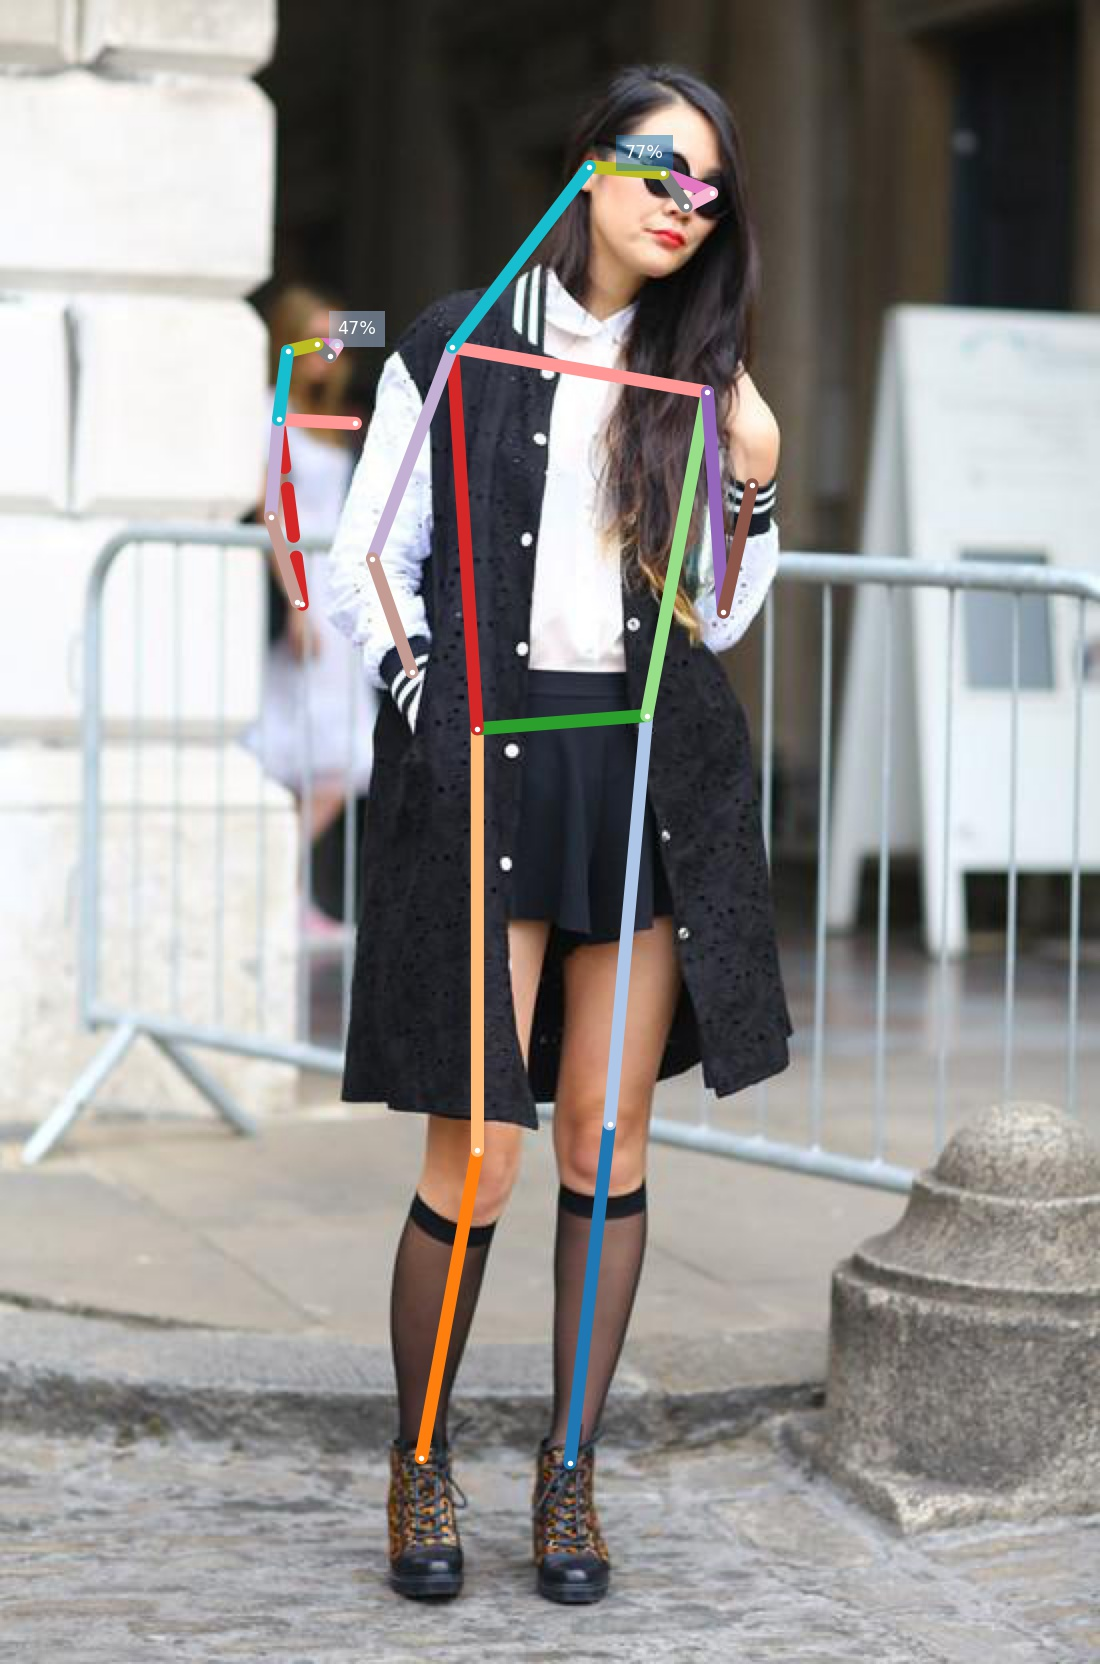

In [ ]:
import IPython
IPython.display.Image('/content/0001.jpg.predictions.jpeg')

In [ ]:
%%bash
python -m json.tool /content/DEMO_02.jpg.predictions.json

[
    {
        "keypoints": [
            534.33,
            368.05,
            0.83,
            548.54,
            355.13,
            0.82,
            520.37,
            355.37,
            0.78,
            565.15,
            360.03,
            0.73,
            501.89,
            358.38,
            0.76,
            583.62,
            447.67,
            0.75,
            476.03,
            440.03,
            0.75,
            597.54,
            557.67,
            0.8,
            453.05,
            538.64,
            0.55,
            579.13,
            650.39,
            0.82,
            0.0,
            -1.0,
            0.0,
            548.07,
            643.48,
            0.73,
            477.64,
            624.7,
            0.76,
            530.94,
            767.91,
            0.68,
            453.12,
            706.82,
            0.86,
            518.43,
            879.25,
            0.68,
            472.79,
            839.2,
          